<a href="https://colab.research.google.com/github/rameshbabuatreyu/AI-ML/blob/master/Convert_Celcius_to_Farenh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 46kB/s 
     |████████████████████████████████| 3.0MB 36.2MB/s 
     |████████████████████████████████| 419kB 61.1MB/s 


Importing libraries

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Connect to google drive

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Upload Dataset

In [0]:
temp_file=pd.read_csv('/content/Celsius-to-Fahrenheit.csv')

In [8]:
temp_file.head(10)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [9]:
temp_file.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [10]:
temp_file.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [11]:
temp_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


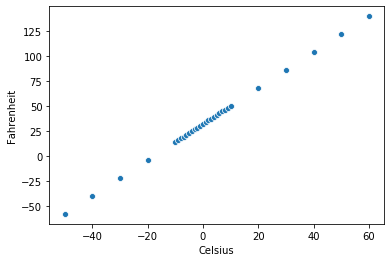

In [12]:
sns.scatterplot(temp_file['Celsius'],temp_file['Fahrenheit'])

Build Model

In [0]:
X_train=temp_file['Celsius']
y_train=temp_file['Fahrenheit']

In [14]:
X_train.shape

(30,)

In [15]:
y_train.shape

(30,)

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.9),loss="mean_squared_error")

In [33]:
epochs_hist=model.fit(X_train,y_train,epochs=100)

Train on 30 samples
Epoch 1/100
30/30 [==============================] - 0s 3ms/sample - loss: 506.8672
Epoch 2/100
30/30 [==============================] - 0s 150us/sample - loss: 872.4754
Epoch 3/100
30/30 [==============================] - 0s 167us/sample - loss: 454.4068
Epoch 4/100
30/30 [==============================] - 0s 143us/sample - loss: 482.8860
Epoch 5/100
30/30 [==============================] - 0s 134us/sample - loss: 595.7272
Epoch 6/100
30/30 [==============================] - 0s 63us/sample - loss: 505.2430
Epoch 7/100
30/30 [==============================] - 0s 150us/sample - loss: 347.4723
Epoch 8/100
30/30 [==============================] - 0s 57us/sample - loss: 266.6219
Epoch 9/100
30/30 [==============================] - 0s 136us/sample - loss: 287.2245
Epoch 10/100
30/30 [==============================] - 0s 100us/sample - loss: 323.0678
Epoch 11/100
30/30 [==============================] - 0s 80us/sample - loss: 297.8392
Epoch 12/100
30/30 [=================

In [34]:
epochs_hist.history.keys()

dict_keys(['loss'])

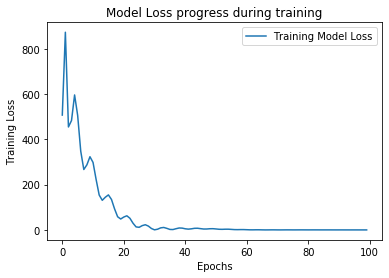

In [39]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss progress during training')
plt.xlabel("Epochs")
plt.ylabel('Training Loss')
plt.legend(["Training Model Loss"])

In [40]:
model.get_weights()

[array([[1.7951019]], dtype=float32), array([32.013367], dtype=float32)]

In [41]:
Temp_C=15
Temp_F=model.predict([Temp_C])
print("Predicted temp using ANN model: ", Temp_F)

Predicted temp using ANN model:  [[58.939896]]


In [42]:
Temp_C=0
Temp_F=model.predict([Temp_C])
print("Predicted temp using ANN model: ", Temp_F)

Predicted temp using ANN model:  [[32.013367]]


In [45]:
Temp_C=-32
Temp_F=model.predict([Temp_C])
print("Predicted temp using ANN model: ", Temp_F)

Predicted temp using ANN model:  [[-25.429893]]


In [46]:
#Lets confirm through equ

Temp_F=9/5*Temp_C+32
print("Predicted temp using equ: ", Temp_F)


Predicted temp using equ:  -25.6
